# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


## Desarrollo

### 1. Análisis exploratorio inicial
Visualizar las primeras filas.
Realizar un resumen de 5 números.
Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
Identificar las variables de entrada y de salida del problema.
Variables de entrada:
Realizar los siguientes análisis por tipo de variable.
Numéricas:
Obtener conclusiones acerca de la distribución de los datos.
Categóricas
Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
Variables de salida:
¿Están balanceadas las clases?
¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import seaborn as sns; sns.set()
import re

#### Defino una función que me asegura si puedo aplicar CCA

Defino una función que me devuelve el porcentaje de valores nulos dada una colunna.

In [2]:
def porcentaje_nulos(columna):
    m = columna.shape[0]
    num_nul = columna.isnull().sum()
    porc_nul = (num_nul * 100)/m
    return porc_nul
    

Función que  devuelve en booleano si una determinada columna tiene o no el numero de valores nulos mayor al 5% del dataset

In [3]:
def cca(columna):
    m = columna.shape[0]
    porc_minimo = (5*m)/100
    num_nul = columna.isnull().sum()
    if num_nul < porc_minimo:
        return True
    else:
        return False

?

In [4]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

Función que dada una lista donde figuran los nombres de determinadas columnas, devuelve cuales tienen valores nulos menores al 5% y cuales no.

In [5]:
def col_cca_nocca(columnas):    
    cca_columns = []
    no_cca_columns = []
    for i in columnas:
        if cca(df[i]):
            cca_columns.append(i)
        else:
            no_cca_columns.append(i)
    return cca_columns, no_cca_columns

Función que devuelve en booleano si una columna tiene mas de 35% de datos faltantes

In [6]:
def mayor_35(columnas):
    m = columnas.shape[0]
    porc_minimo = (35*m)/100
    num_nul = columnas.isnull().sum()
    if num_nul > porc_minimo:
        return True
    else:
        return False
    

Función que dada una lista donde figuran los nombres de determinadas columnas, devuelve cuales tienen valores nulos menores al 35% y cuales no.

In [7]:
def col_mayor_35(columnas):    
    col_mayor_35 = []
    no_col_mayor_35 = []
    for i in columnas:
        if mayor_35(df[i]):
            col_mayor_35.append(i)
        else:
            no_col_mayor_35.append(i)
    return col_mayor_35, no_col_mayor_35

Función que separa strings que tiene dos palabras unidas en formato camel case

In [8]:
 def camel_case_split(str):
        splitted = re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str)
        joined = ' '.join(splitted)
        return joined

# 1.- Análisis exploratorio inicial

In [9]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [12]:
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

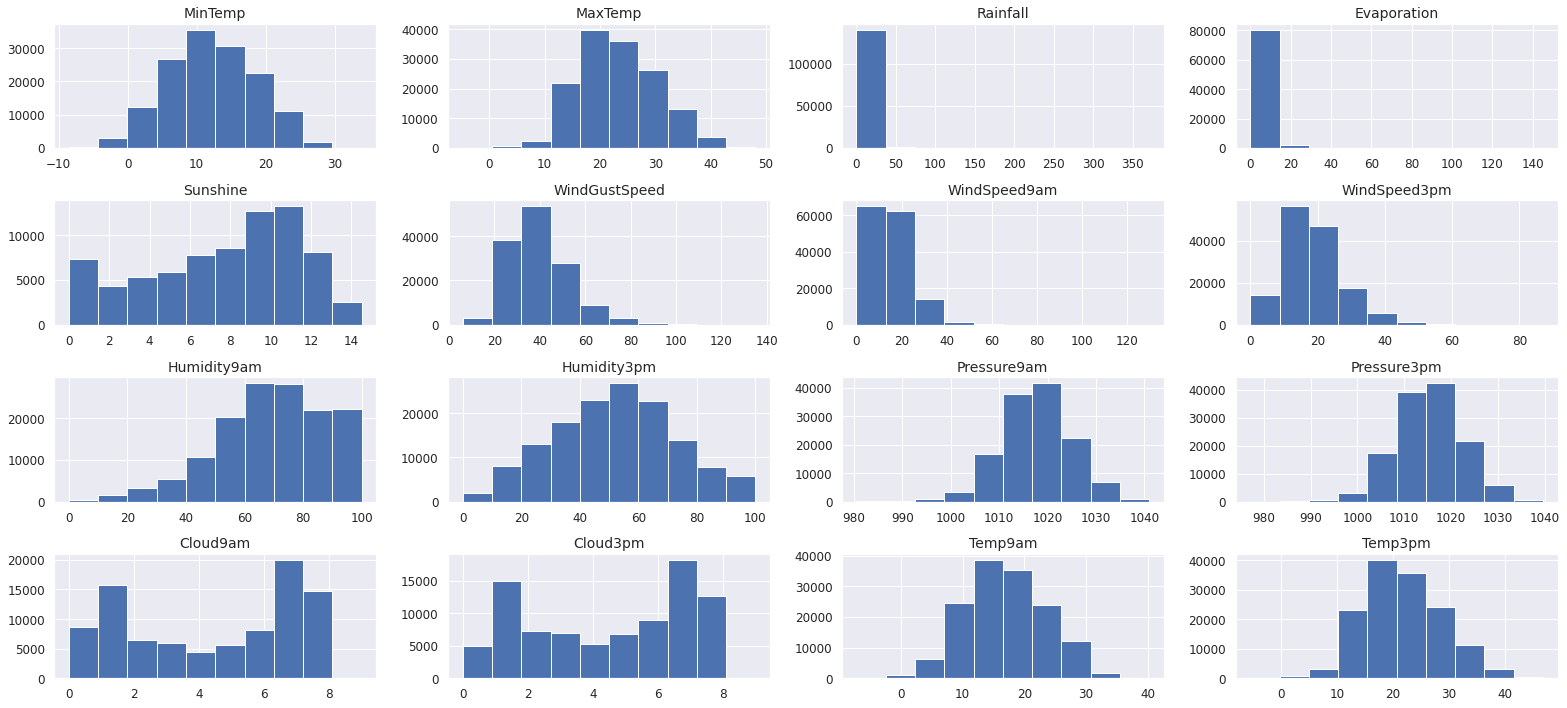

In [13]:

display_dataset_distributions(df)


###  Vemos a detalle las variables categoricas

Obtenemos cuales son las columnas categoricas

In [14]:
col_categorical = [var for var in df.columns if df[var].dtype=='O']

In [15]:
col_categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Reviamos la cardinalidad de las columnas categoricas

In [16]:
for i in col_categorical:
    print(f"{i}: {len(df[i].unique())} etiquetas")

Date: 3436 etiquetas
Location: 49 etiquetas
WindGustDir: 17 etiquetas
WindDir9am: 17 etiquetas
WindDir3pm: 17 etiquetas
RainToday: 3 etiquetas
RainTomorrow: 3 etiquetas


#### Tratamiento de la columna Date (Alta cardinalidad)

Vemos que Date tiene una gran cardinalidad, lo cual puede ocasionar problemas posteriores.

In [17]:
df["Date"].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

Al momento de predecir si llueve o no seria más sencillo tratar la columna en base al mes. 

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

Incoporamos la columna month y eliminamos Date

In [19]:
df.drop('Date', axis=1, inplace = True)

#### Tratamiento de la columna Location (Alta cardinalidad)

La segunda columna con mayor cardinalidad es Location

In [20]:
df["Location"].head

<bound method NDFrame.head of 0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 145460, dtype: object>

En base a una previa investigación, se llegó la punto de convertir las ciudades en coordenadas (latitud, longitud).
Fuentes:
* https://amaral.northwestern.edu/blog/getting-long-lat-list-cities
* https://peterhaas-me.medium.com/how-to-geocode-with-python-and-pandas-4cd1d717d3f7
* https://geopy.readthedocs.io/en/stable/

Para no hacer largo el proceso de intercambio entre ciudad a longitud, latitud se obtendra la lista de las ciuades en el dataset (sin repetir)

In [21]:
locations = df["Location"].unique()

Separamos los nombres de las ciudades que estan unidas

In [22]:
locations_pro = []
for i in locations:
    locations_pro.append(camel_case_split(i))

Se crea momentaneamente un DataFrame auxiliar para añadir las columnas de Latitud, Longitud a lado de la correspondiente ciudad

In [23]:
df_locations = pd.DataFrame({'Locations':locations_pro})

In [24]:
df_locations.head()

,Locations
0,Albury
1,Badgerys Creek
2,Cobar
3,Coffs Harbour
4,Moree


Se obtienen las coordenadas

In [25]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
df_locations['gcode'] = df_locations.Locations.apply(geolocator.geocode)
df_locations['lat'] = [g.latitude for g in df_locations.gcode]
df_locations['long'] = [g.longitude for g in df_locations.gcode]

In [26]:
df_locations

,Locations,gcode,lat,long
0,Albury,"(Albury, Albury City Council, New South Wales,...",-36.080477,146.916280
1,Badgerys Creek,"(Badgerys Creek, Sydney, Liverpool City Counci...",-33.881667,150.744163
2,Cobar,"(Cobar, Cobar Shire Council, New South Wales, ...",-31.498333,145.834444
3,Coffs Harbour,"(Coffs Harbour, Coffs Harbour City Council, Ne...",-30.296241,153.113529
4,Moree,"(Morée, Vendôme, Loir-et-Cher, Centre-Val de L...",47.901594,1.237803
5,Newcastle,"(Newcastle upon Tyne, Tyne and Wear, North Eas...",54.973847,-1.613157
6,Norah Head,"(Norah Head, Central Coast Council, New South ...",-33.281667,151.567778
7,Norfolk Island,"(Norfolk Island, Burnt Pine, Norfolk Island, 2...",-29.028958,167.958729
8,Penrith,"(Penrith, Eden, Cumbria, North West England, E...",54.663913,-2.752205
9,Richmond,"(Richmond, Virginia, United States, (37.538508...",37.538509,-77.434280


In [27]:
#df_loc_name = pd.DataFrame({'Location':locations_pro})

In [28]:
#df_loc_name.head()

Se realiza un diccionario entre los nombres de las ciudades originales con algunos casos donde el nombre de la ciudad esta unido junto a los mismos nombres de las ciudades pero con todos los nombres separados.

In [29]:
dict_loc = dict(zip(locations,locations_pro))

In [30]:
dict_loc

{'Albury': 'Albury',
 'BadgerysCreek': 'Badgerys Creek',
 'Cobar': 'Cobar',
 'CoffsHarbour': 'Coffs Harbour',
 'Moree': 'Moree',
 'Newcastle': 'Newcastle',
 'NorahHead': 'Norah Head',
 'NorfolkIsland': 'Norfolk Island',
 'Penrith': 'Penrith',
 'Richmond': 'Richmond',
 'Sydney': 'Sydney',
 'SydneyAirport': 'Sydney Airport',
 'WaggaWagga': 'Wagga Wagga',
 'Williamtown': 'Williamtown',
 'Wollongong': 'Wollongong',
 'Canberra': 'Canberra',
 'Tuggeranong': 'Tuggeranong',
 'MountGinini': 'Mount Ginini',
 'Ballarat': 'Ballarat',
 'Bendigo': 'Bendigo',
 'Sale': 'Sale',
 'MelbourneAirport': 'Melbourne Airport',
 'Melbourne': 'Melbourne',
 'Mildura': 'Mildura',
 'Nhil': 'Nhil',
 'Portland': 'Portland',
 'Watsonia': 'Watsonia',
 'Dartmoor': 'Dartmoor',
 'Brisbane': 'Brisbane',
 'Cairns': 'Cairns',
 'GoldCoast': 'Gold Coast',
 'Townsville': 'Townsville',
 'Adelaide': 'Adelaide',
 'MountGambier': 'Mount Gambier',
 'Nuriootpa': 'Nuriootpa',
 'Woomera': 'Woomera',
 'Albany': 'Albany',
 'Witchcliffe':

Se utiliza el diccionario para reemplazar los nombres de las ciudades de la columna de Location del dataset original

In [31]:
df['Location'].map(dict_loc) 

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 145460, dtype: object

In [32]:
df['long'] = df['Location']

In [33]:
df['Location'] = df['Location'].map(df_locations.set_index('Locations')['lat'])

In [34]:
df['long'] = df['long'].map(df_locations.set_index('Locations')['long'])

In [35]:
df.rename({'Location':'lat'}, axis=1)

,lat,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,long
0,-36.080477,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,146.916280
1,-36.080477,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,146.916280
2,-36.080477,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,146.916280
3,-36.080477,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,146.916280
4,-36.080477,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,146.916280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-25.344857,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6,131.032517
145456,-25.344857,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6,131.032517
145457,-25.344857,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6,131.032517
145458,-25.344857,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,6,131.032517


Volvemos a ver las columnas con alta cardinalidad

In [36]:
col_categorical = [var for var in df.columns if df[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(df[i].unique())} etiquetas")

WindGustDir: 17 etiquetas
WindDir9am: 17 etiquetas
WindDir3pm: 17 etiquetas
RainToday: 3 etiquetas
RainTomorrow: 3 etiquetas


Vemos cuales de las columnas tienen nulos no mayor al 5$ del dataset

In [37]:
for i in col_categorical:
    print(f"{i}: {cca(df[i])}")

WindGustDir: False
WindDir9am: False
WindDir3pm: True
RainToday: True
RainTomorrow: True


Vemos que RainToday y RainTomorrow tienen nulos menor al 5% del dataset. Recordar que RainTomorrow es nuestro target.

Vemos las frecuencias de las etiquetas de WindGustDir

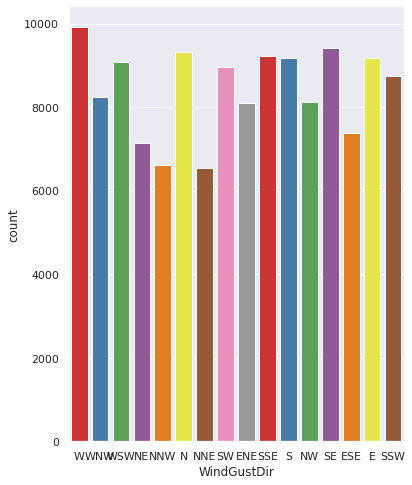

In [38]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindGustDir", data=df, palette="Set1")
plt.show()

Vemos las frecuencias de las etiquetas de WindDir9am

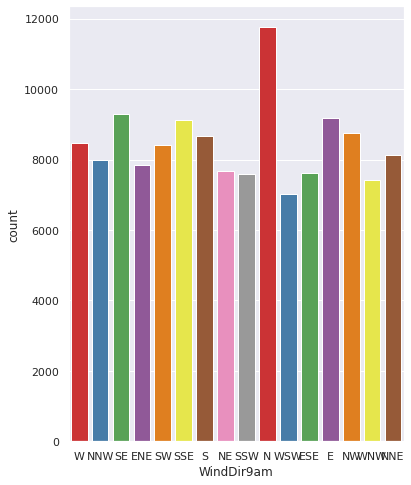

In [39]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir9am", data=df, palette="Set1")
plt.show()

Vemos las frecuencias de las etiquetas de WindDir3pm

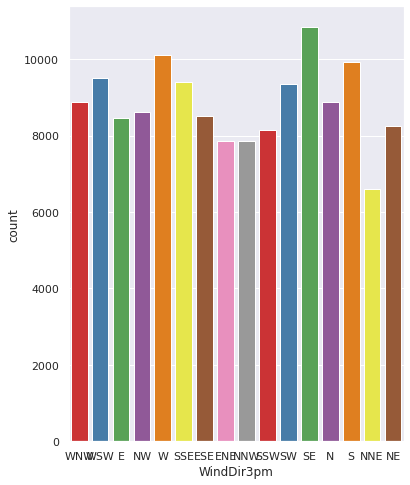

In [40]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir3pm", data=df, palette="Set1")
plt.show()

Vemos las frecuencias de las etiquetas de RainToday

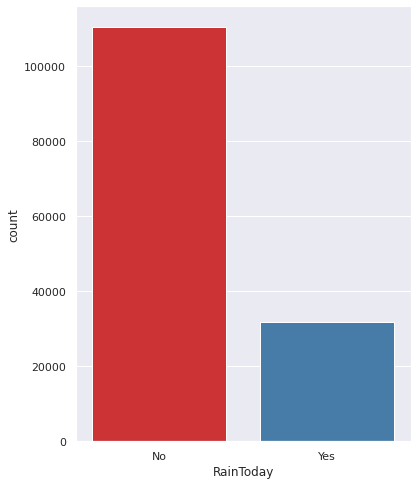

In [41]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()

Vemos las frecuencias de las etiquetas de RainTomorrow

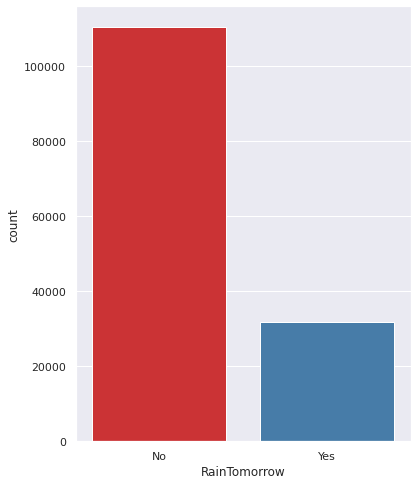

In [42]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

La variable de salida está desbalanceada. Para ver el verdadero resultado de los modelos a aplicar, tomando en cuenta que la columna target está desbalanceada, se utilizarán las métricas F1-score y la curva de ROC.


### Ahora veremos sobre las columnas numericas

In [43]:
numerical_col = df._get_numeric_data().columns
print(numerical_col)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Month', 'long'],
      dtype='object')


<AxesSubplot:>

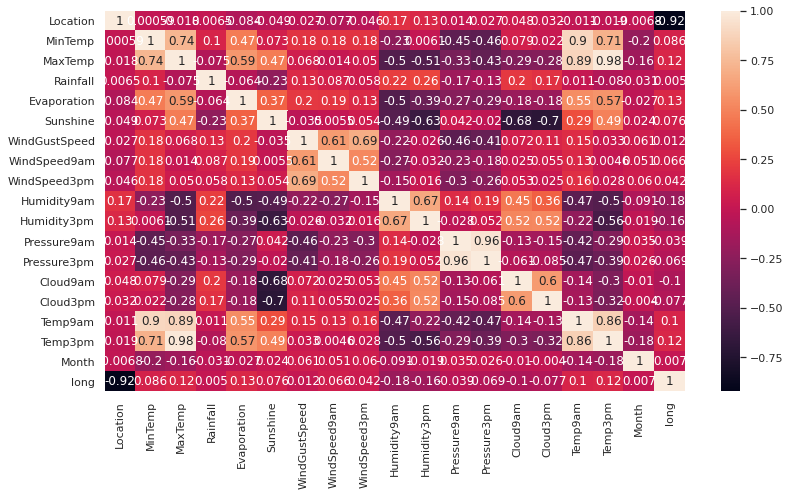

In [44]:
plt.figure(figsize=(13,7))

sns.heatmap(df.corr(),annot=True)

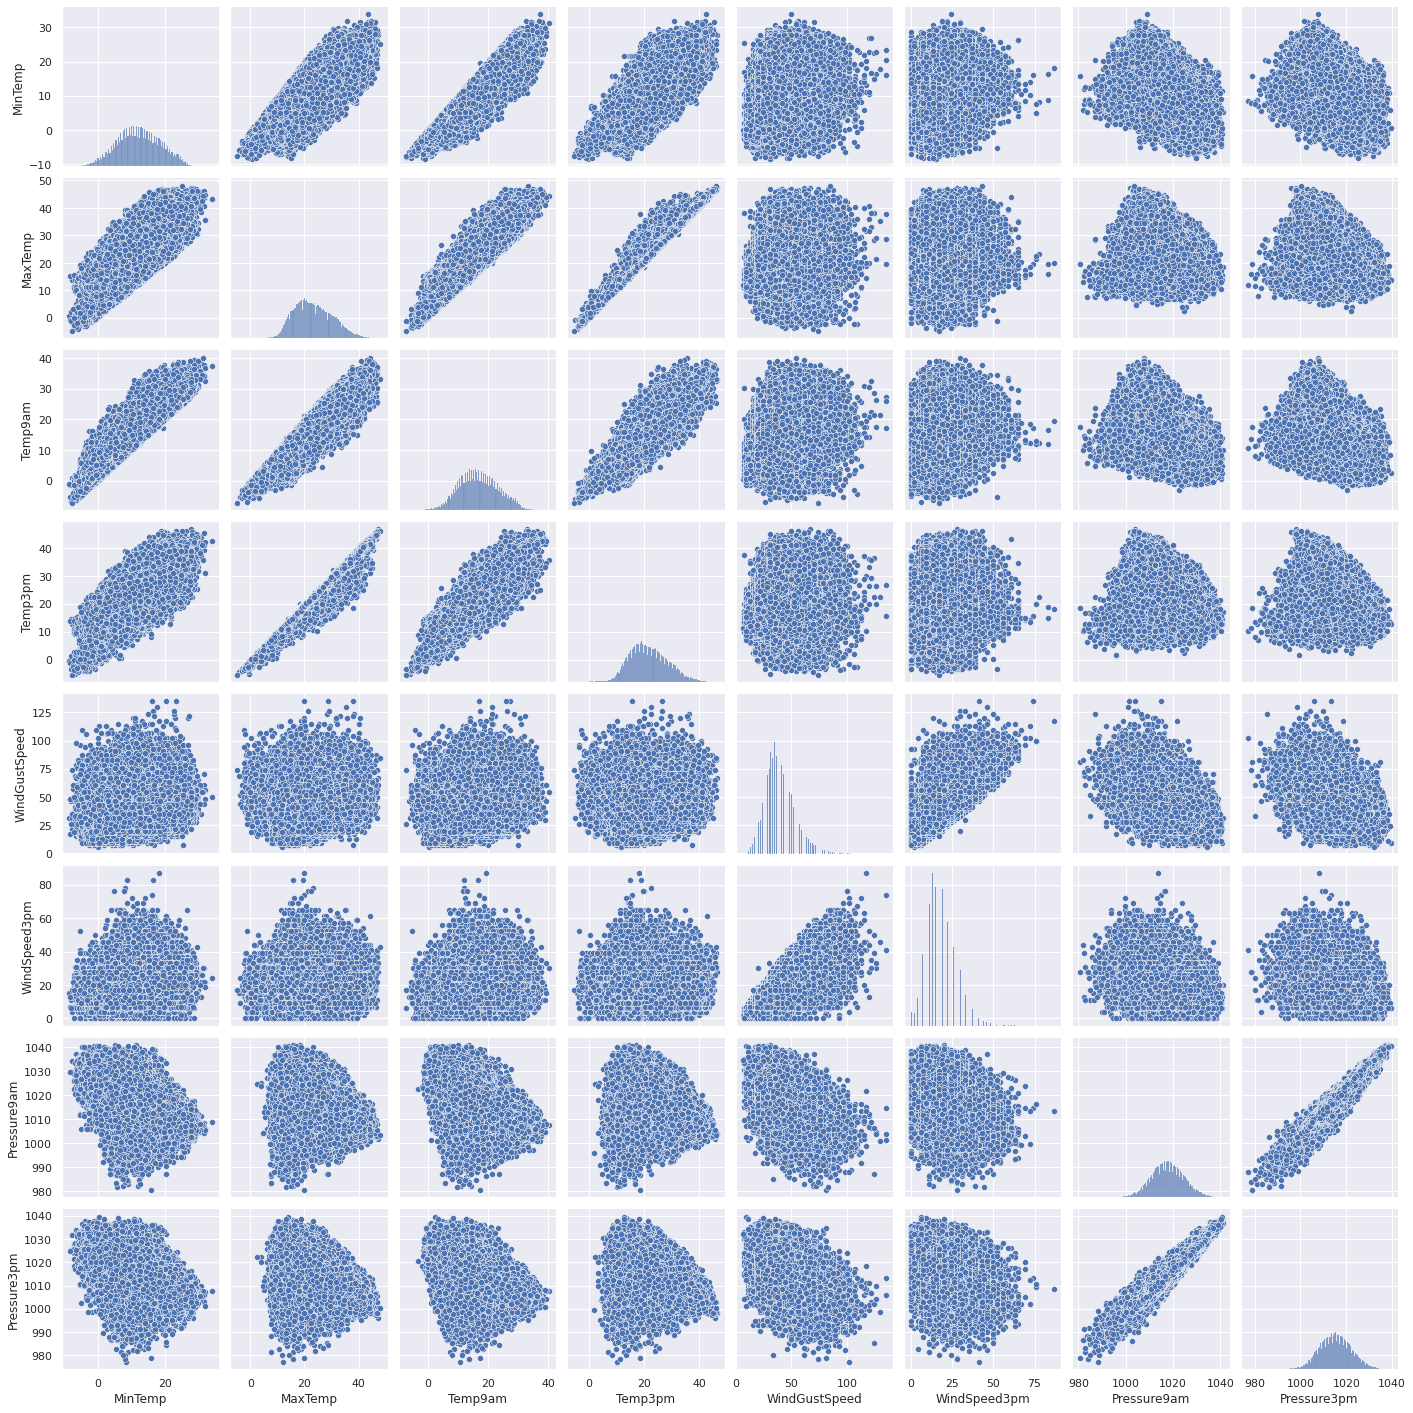

In [45]:
altamente_corr = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(df[altamente_corr], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

### Análsis Bi-variable

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

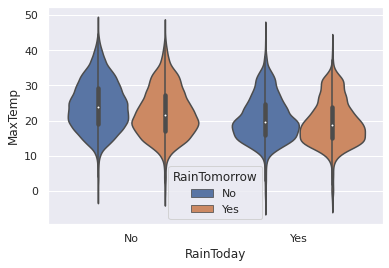

In [46]:
sns.violinplot(x='RainToday',y='MaxTemp',data=df,hue='RainTomorrow')

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

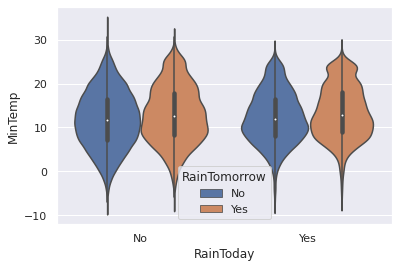

In [47]:
sns.violinplot(x='RainToday',y='MinTemp',data=df,hue='RainTomorrow')

Text(0, 0.5, 'RainTomorrow')

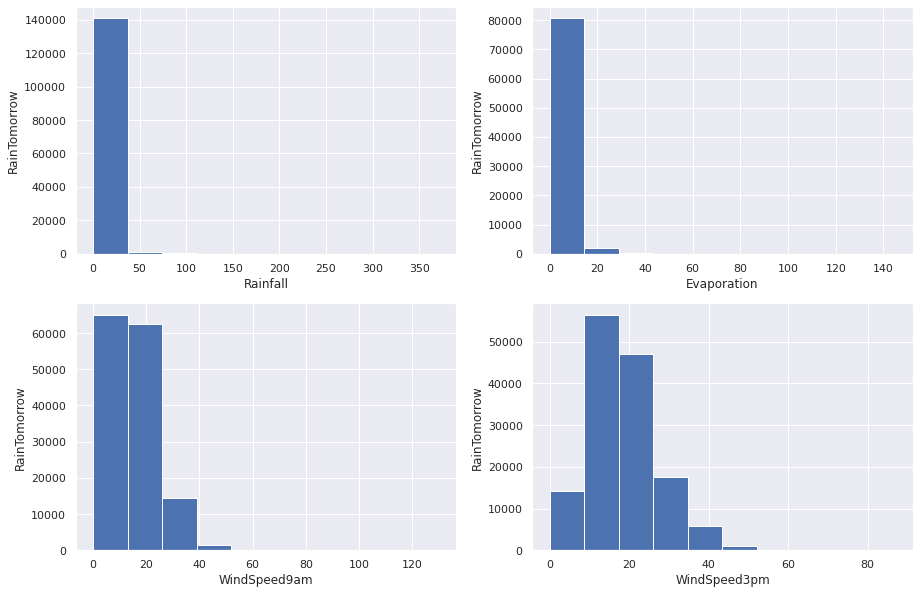

In [48]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

# Limpieza y preparación de datos / ingeniería de features

Vemos como van los datos nulos

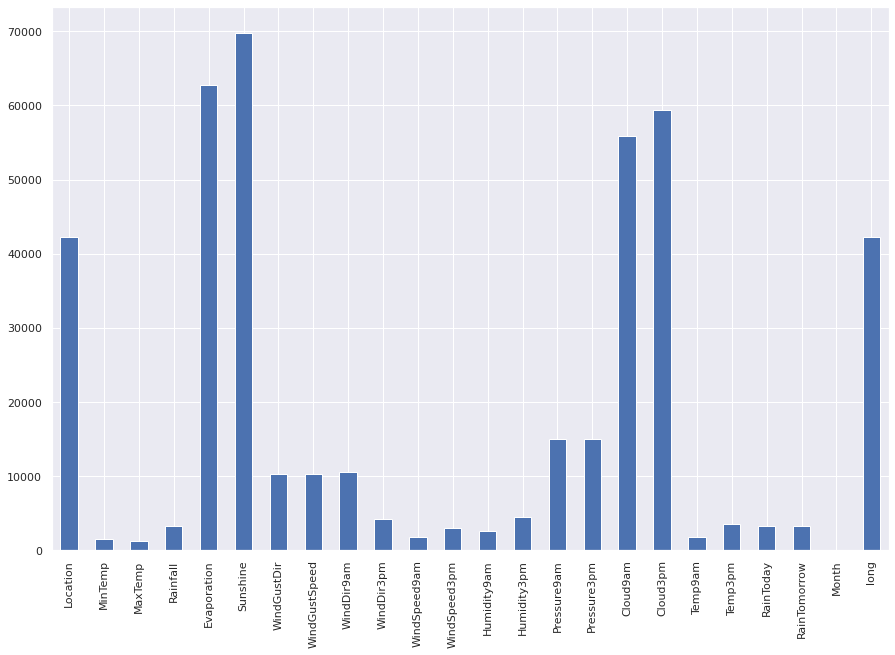

In [49]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

Eliminamos las columnas que tengan más del 35% de datos nulos

In [50]:
columnas = np.array(df.columns)
col_mayor_35, no_col_mayor_35 = col_mayor_35(columnas)
print(col_mayor_35)
print(no_col_mayor_35)

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'long']


In [51]:
df = df.drop(columns=col_mayor_35,axis=1)

Se obtiene que columnas tienen menos del 5% de datos faltantes, y cuales no

In [52]:
columnas = np.array(df.columns)
cca_columns, no_cca_columns = col_cca_nocca(columnas)

## Tratamiento columnas numericas con datos faltantes menor a 5%

In [53]:
print(cca_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month']


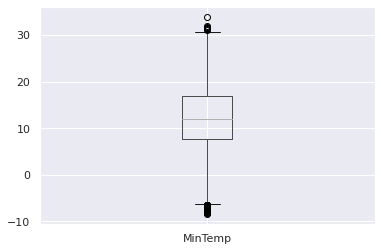

In [54]:
df.boxplot(column='MinTemp', return_type='axes');

In [55]:
df['MinTemp'].fillna((df['MinTemp'].mean()), inplace=True)

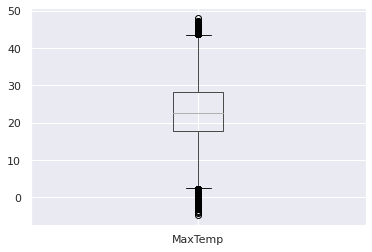

In [56]:
df.boxplot(column='MaxTemp', return_type='axes');

In [57]:
df['MaxTemp'].fillna((df['MaxTemp'].mean()), inplace=True)

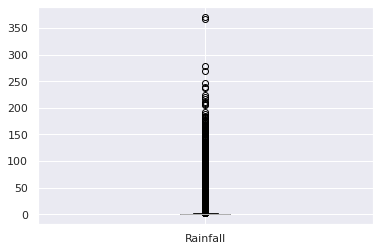

In [58]:
df.boxplot(column='Rainfall', return_type='axes');

In [59]:
df['Rainfall'].fillna((df['Rainfall'].median()), inplace=True)

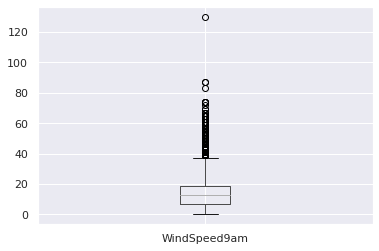

In [60]:
df.boxplot(column='WindSpeed9am', return_type='axes');

In [61]:
df['WindSpeed9am'].fillna((df['WindSpeed9am'].median()), inplace=True)

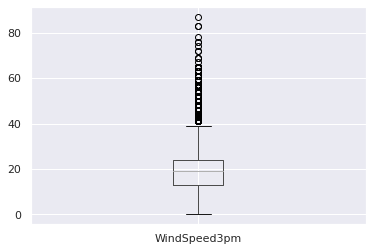

In [62]:
df.boxplot(column='WindSpeed3pm', return_type='axes');

In [63]:
df['WindSpeed3pm'].fillna((df['WindSpeed3pm'].median()), inplace=True)

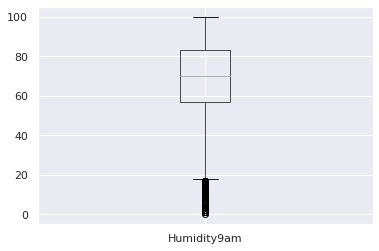

In [64]:
df.boxplot(column='Humidity9am', return_type='axes');

In [65]:
df['Humidity9am'].fillna((df['Humidity9am'].median()), inplace=True)

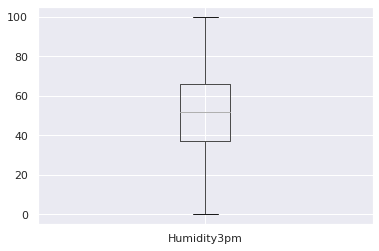

In [66]:
df.boxplot(column='Humidity3pm', return_type='axes');

In [67]:
df['Humidity3pm'].fillna((df['Humidity3pm'].mean()), inplace=True)

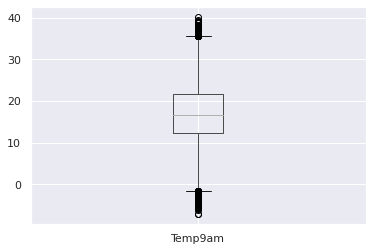

In [68]:
df.boxplot(column='Temp9am', return_type='axes');

In [69]:
df['Temp9am'].fillna((df['Temp9am'].mean()), inplace=True)

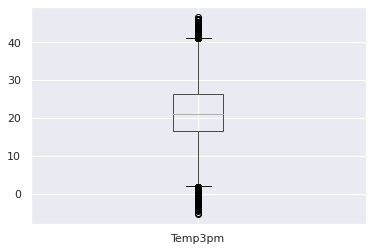

In [70]:
df.boxplot(column='Temp3pm', return_type='axes');

In [71]:
df['Temp3pm'].fillna((df['Temp3pm'].mean()), inplace=True)

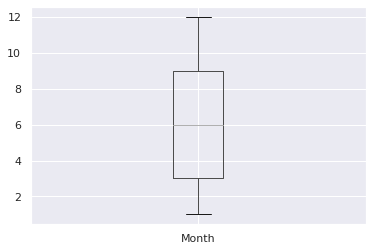

In [72]:
df.boxplot(column='Month', return_type='axes');

In [73]:
df['Month'].fillna((df['Month'].mean()), inplace=True)

## Tratamiento columnas numericas con datos faltantes mayor a 5%

array([[<AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

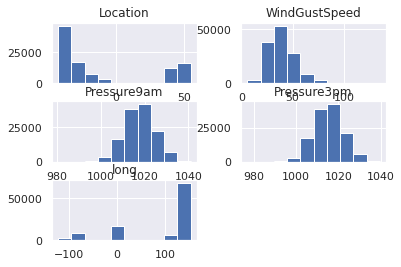

In [74]:
columnas = np.array(df.columns)
cca_columns, no_cca_columns = col_cca_nocca(columnas)
numerical_col = df[no_cca_columns]._get_numeric_data().columns
df[numerical_col].hist()

In [75]:
df["WindGustSpeed"].fillna(value=df["WindGustSpeed"].median(), inplace=True)

In [76]:
df["Pressure3pm"].fillna(value=df["Pressure3pm"].mean(), inplace=True)

In [77]:
df["Pressure9am"].fillna(value=df["Pressure9am"].mean(), inplace=True)

En el caso de location (latitud) y la location_ (longitud) vamos a eliminar los datos nulos

## Tratamiento columnas categoricas con datos faltantes 

In [78]:
df[cca_columns].columns[df[cca_columns].isna().any()].tolist()

['WindDir3pm', 'RainToday', 'RainTomorrow']

Se hace one hot encoding a las columnas: WindGustDir","WindDir9am","WindDir3pm

In [79]:
cat_variables = df[["WindGustDir","WindDir9am","WindDir3pm"]]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
df = df.drop(["WindGustDir","WindDir9am","WindDir3pm"], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,-36.080477,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,1,0
1,-36.080477,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,1
2,-36.080477,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,1
3,-36.080477,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,-36.080477,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,1,0,0,0,0,0,0,0,0


Ya que las columnas RainTommorrow y RainToday tienen datos binarios los convertimos a 0,1 respectivamente

In [80]:
df["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [81]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

Se visualiza como van los datos nulos al momento

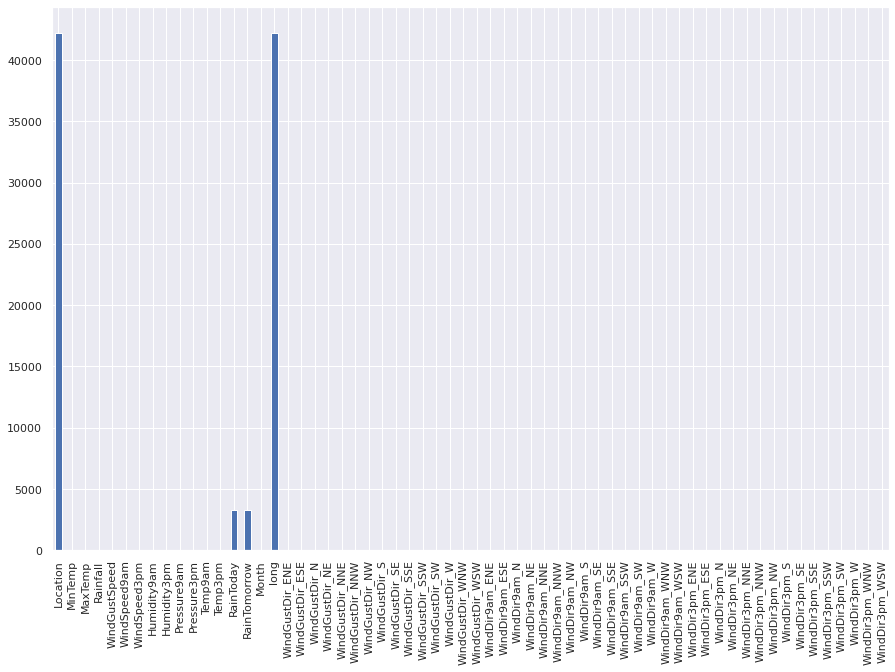

In [82]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

Reemplazar valores en los registros faltantes de latitud y longitud es trival. Por lo que eliminaremos los registros nulos que se presenten en estas columnas.Ya que son parejos, solo basta con eliminar los registros de una columna para que se elimine tambien en la otra.

In [83]:
df = df[df['long'].notna()]

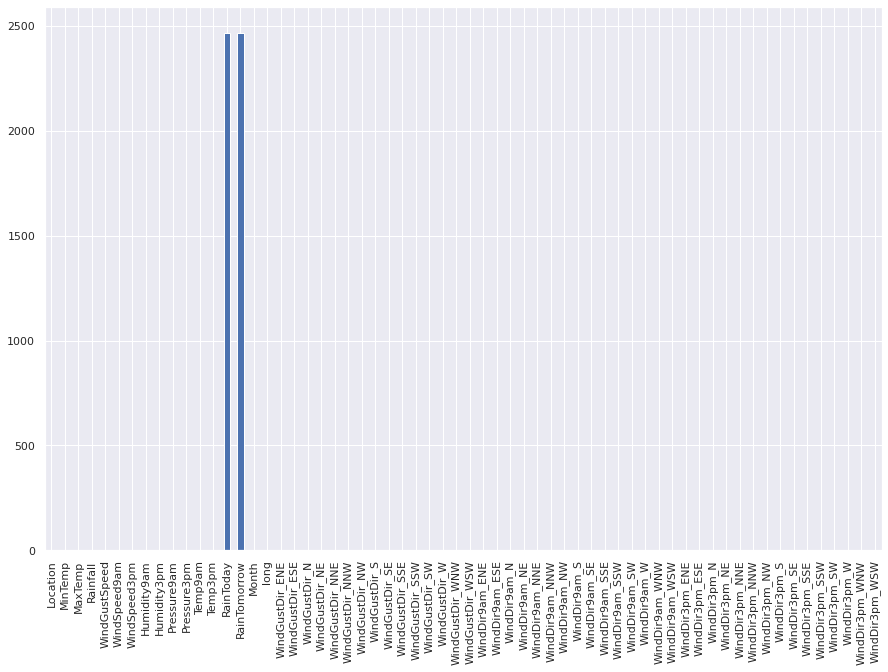

In [84]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

Rellenamos los datos faltantes en RainTomorrow y RainToday con KNN

In [85]:
df['RainTomorrow']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 103223, dtype: float64

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.06951,0.513064,0.446154,0.001632,0.294574,0.153846,0.289157,0.71,0.22,0.435593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.06951,0.370546,0.494505,0.000000,0.294574,0.030769,0.265060,0.44,0.25,0.484746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.06951,0.501188,0.507692,0.000000,0.310078,0.146154,0.313253,0.38,0.30,0.433898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.06951,0.413302,0.558242,0.000000,0.139535,0.084615,0.108434,0.45,0.16,0.603390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06951,0.610451,0.652747,0.002720,0.271318,0.053846,0.240964,0.82,0.33,0.488136,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [88]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.06951,0.513064,0.446154,0.001632,0.294574,0.153846,0.289157,0.71,0.22,0.435593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.06951,0.370546,0.494505,0.000000,0.294574,0.030769,0.265060,0.44,0.25,0.484746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.06951,0.501188,0.507692,0.000000,0.310078,0.146154,0.313253,0.38,0.30,0.433898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.06951,0.413302,0.558242,0.000000,0.139535,0.084615,0.108434,0.45,0.16,0.603390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06951,0.610451,0.652747,0.002720,0.271318,0.053846,0.240964,0.82,0.33,0.488136,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Verficamos que ya no quedan valores nulos

In [89]:
df.isnull().sum()

Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindGustSpeed     0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 62, dtype: int64

# Entrenamiento de modelos

In [90]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

Preparamos la matrix X y la columna target y

In [91]:
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']
lab_enc = preprocessing.LabelEncoder()
y_ = lab_enc.fit_transform(y)
y_pro = y.astype('int')

Realizamos Holdout en los datos

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.30)

Aplicamos dos modelos de clasifiación: Logistic Regression y RandomForest

Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(f"Accuracy: {100*logreg.score(X_test, y_test)} %")

Accuracy: 83.58575257532212 %


/home/fernando/miniconda3/envs/uba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
print(f"Accuracy: {100*rf.score(X_test, y_test)} %")

Accuracy: 84.90651338521651 %


## Evaluacion de resultados

In [96]:
from sklearn.metrics import f1_score

In [97]:
y_pred_log = logreg.predict(X_test)

In [98]:
print(f1_score(y_test, y_pred_log, average='weighted'))


0.8195129197653789


In [99]:
from sklearn.metrics import classification_report
>>> print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     23867
           1       0.00      0.00      0.00       255
           2       0.00      0.00      0.00       101
           3       0.71      0.49      0.58      6744

    accuracy                           0.84     30967
   macro avg       0.39      0.36      0.37     30967
weighted avg       0.82      0.84      0.82     30967



/home/fernando/miniconda3/envs/uba/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fernando/miniconda3/envs/uba/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fernando/miniconda3/envs/uba/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [100]:
y_pred_rf = rf.predict(X_test)
print(f1_score(y_test, y_pred_rf, average='weighted'))

0.8341303054403189


In [101]:
from sklearn.metrics import classification_report
>>> print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     23867
           1       0.69      0.15      0.24       255
           2       0.64      0.09      0.16       101
           3       0.77      0.50      0.60      6744

    accuracy                           0.85     30967
   macro avg       0.74      0.42      0.48     30967
weighted avg       0.84      0.85      0.83     30967

